In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# COVID-19 Cases on October 29, 2020

cases = pd.read_csv('../Data/Source Data/COVID - State - Daily.csv')
cases[(cases['month']==10) & (cases['day']==29)]['case_count'].mean()

175498.33333333334

In [7]:
# Max average change in employment levels

employment = pd.read_csv('../Data/Source Data/Employment Combined - State - Daily.csv')
employment = employment.replace('.', 0)
employment['emp_combined'] = employment['emp_combined'].astype(float)
employment.groupby('statefips').min()['emp_combined'].mean()*100

-23.092156862745092

In [8]:
# Max average change in time spent outside

outside = pd.read_csv('../Data/Source Data/Google Mobility - State - Daily.csv')
outside = outside.replace('.', 0)
outside['gps_away_from_home'] = outside['gps_away_from_home'].astype(float)
outside.groupby('statefips').min()['gps_away_from_home'].mean()*100

-22.696078431372552

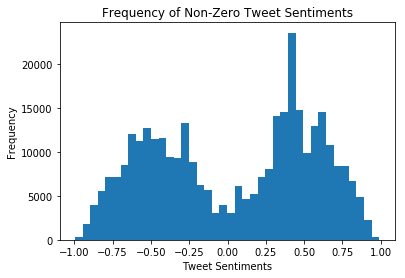

In [11]:
sentiments = pd.read_csv('../Data/Data Processing/final.csv')
plt.title("Frequency of Non-Zero Tweet Sentiments")
plt.hist(sentiments[sentiments['vaderPol']!=0]['vaderPol'], bins=40)
plt.xlabel("Tweet Sentiments")
plt.ylabel("Frequency")
plt.show()

[215547, 334303]


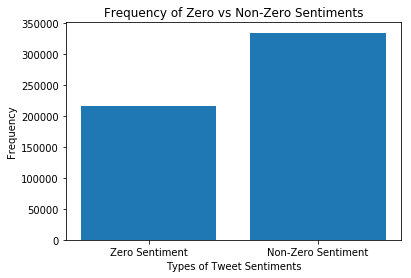

In [12]:
sentiments['nonZero'] = (sentiments['vaderPol'] != 0).astype(int)
nonZero = sentiments['nonZero'].sum()
parity = [len(sentiments['nonZero'])-nonZero, nonZero]
print(parity)
plt.title('Frequency of Zero vs Non-Zero Sentiments')
plt.bar([0,1], parity)
plt.xticks([0,1], ['Zero Sentiment', 'Non-Zero Sentiment'])
plt.xlabel('Types of Tweet Sentiments')
plt.ylabel('Frequency')
plt.show()

In [13]:
stateCount = sentiments.groupby('state').count().sort_values(by='date', ascending=False)[['date']]
stateCount.columns = ['count']
#stateCount.to_csv('stateCount.csv')